In [61]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
rcParams['figure.figsize'] = 80,50

In [62]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})


In [63]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [76]:
#scale coversion
scaler = MinMaxScaler()

imagesTrain_scaled = scaler.fit_transform(imagesTrain)
imagesTest_scaled = scaler.transform(imagesTest)


In [77]:
#PCA conversion
pca = PCA(n_components = 200)

imagesTrain_pca = pca.fit_transform(imagesTrain_scaled)
imagesTest_pca = pca.transform(imagesTest_scaled)

imagesTrain_pca = pd.DataFrame(imagesTrain_pca) 
imagesTest_pca = pd.DataFrame(imagesTest_pca) 

In [78]:
pca.explained_variance_ratio_.sum()


0.9251207012552682

In [79]:
imagesTest_pca

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,48.059361,-7.540679,29.969531,-5.315505,-15.457418,16.893366,2.949694,7.605345,12.098678,-6.642786,...,0.538255,-0.932107,1.364569,2.347144,-0.939988,0.940724,-0.352496,-2.018649,-0.200121,0.431676
1,0.820236,-27.281721,-7.111534,-8.965262,-22.613351,0.329832,-2.246121,0.748770,-6.614702,0.395834,...,-0.824587,0.378681,-0.293106,-0.055286,0.669681,0.957696,-0.965915,0.188672,0.919123,-0.227647
2,-1.962328,-12.507798,7.254397,15.888151,7.312346,-4.792634,-3.345884,-3.819739,-0.684206,-1.288713,...,-0.286031,0.021779,-0.136995,0.454137,0.824283,0.048116,-0.526166,-0.311704,1.056666,-0.166005
3,-2.870854,-1.614907,-6.958116,-14.572655,1.557050,-17.588139,2.578424,12.605300,8.454696,-4.377907,...,1.624741,0.574438,-0.639983,-0.537134,0.941976,-1.114240,0.657600,-0.476984,0.665552,2.345805
4,50.890744,5.278716,12.451760,1.252071,2.974158,2.042322,-8.682441,3.647512,3.657731,-0.283561,...,0.188789,0.195021,0.406355,-0.852571,-0.183674,0.225757,-0.141638,0.499941,-0.713147,0.137658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-12.945214,1.983384,3.795344,12.946054,0.437530,-0.861495,-7.940751,2.238091,-6.503495,2.030353,...,-0.465441,-0.166350,0.259988,-0.069975,0.356615,0.406749,0.632806,-0.266380,-0.478454,0.721603
996,32.291390,6.872361,-1.642552,28.671672,3.797329,-7.216869,-0.271085,-2.365193,-3.967490,-12.026146,...,-0.117013,-0.761827,-0.360507,0.122464,-0.635955,0.083847,-0.109383,-0.328697,0.657153,0.204648
997,-57.993031,-2.904355,16.435442,6.601126,10.808563,-1.658077,-18.527252,-2.372824,-1.914021,2.131079,...,-1.483161,1.132254,0.122314,0.249492,1.085965,-0.451713,-0.672293,-0.159250,-0.681779,-0.364463
998,32.632843,-39.042436,-9.664940,-6.613985,-14.901831,0.988480,-16.292123,9.286934,-4.626422,-0.555676,...,-1.745544,0.896201,1.992238,-0.821772,0.969909,-1.128327,0.352100,0.522981,-0.689321,0.700377


In [80]:
imagesTrain_pca

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,26.669027,-3.010113,0.366209,-12.013860,-10.728321,4.044433,26.860383,5.570333,-8.822359,1.238482,...,0.208568,0.702168,1.421361,-0.840215,-1.806100,0.462733,0.898519,0.122703,-0.814010,-1.404137
1,-8.542702,20.497358,1.708910,-5.413798,-4.178639,1.759209,-6.362811,-13.287253,6.202106,-6.723458,...,0.642239,-0.537425,0.125204,-0.412925,1.412048,-0.016025,-0.443222,0.829608,0.553920,0.238832
2,24.068655,-4.079156,-13.739504,-5.215119,-2.575907,13.642572,-9.142209,-18.403577,10.095915,-8.698209,...,-1.016269,0.097791,-0.210440,0.044226,0.647735,0.116583,0.104832,0.235920,-0.200466,1.707617
3,-40.542844,2.332370,25.871265,0.418673,0.756152,-7.282323,-14.998997,-0.572475,-7.597043,4.094117,...,0.047986,0.751729,0.264474,0.357530,0.100732,-0.706106,0.670004,-0.469894,-0.226386,1.557870
4,38.514245,7.115160,-14.013524,1.305666,-2.659288,3.774649,14.906124,4.406511,4.625135,-10.432421,...,1.439520,0.284203,-0.269188,-1.415531,0.431479,-0.009034,-1.323735,-1.257310,0.834117,1.141092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-34.511117,24.379525,-10.107009,-32.831967,-7.765312,4.406494,-4.740041,-10.193578,-3.828774,-2.361405,...,0.756424,0.460944,-0.709364,-0.278269,1.584270,0.602716,-0.543066,-0.732145,-0.084100,0.936429
4996,44.174510,-12.413210,-13.370676,-10.437810,5.773864,-15.869406,1.116529,-13.759635,6.441966,2.991256,...,1.184479,-0.464912,0.681396,-1.313351,-2.028811,1.235093,0.702062,2.359414,0.779362,-0.416888
4997,1.933570,2.291065,2.404113,-5.049897,-4.174332,-9.210949,2.470365,-5.281703,6.752417,-4.806784,...,-0.196029,0.096397,0.462415,0.166726,-0.516798,-0.982261,-0.577684,0.164747,0.431094,0.446108
4998,-24.263832,0.021518,0.488566,2.250925,2.302149,-7.468177,0.250570,-0.719291,3.737165,-1.601230,...,-0.360850,-0.338386,0.658960,0.747935,0.629995,-0.407424,0.071139,0.644741,-0.213342,-0.591638


In [93]:
model = tree.DecisionTreeClassifier(max_depth=5 ,criterion = 'gini')
model.fit(imagesTrain_pca,labelsTrain['smiling'])
model.score(imagesTest_pca,labelsTest['smiling'])

0.701

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [31]:
hyper_params = {
    'max_features' : [i*5 for i in range(1,30)],
    'max_depth' : [1,2,3,4,5,6,7,None]
}

In [37]:
model = tree.DecisionTreeClassifier()
grid=GridSearchCV(model , param_grid=hyper_params , cv=10 , n_jobs=-1)

In [38]:
grid.fit(imagesTrain_pca,labelsTrain['smiling'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145]})

In [39]:
grid.best_params_

{'max_depth': 4, 'max_features': 145}

[Text(0.5, 0.9166666666666666, 'X[32] <= 0.613\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.75, 'X[30] <= -0.282\ngini = 0.485\nsamples = 2972\nvalue = [1230, 1742]'),
 Text(0.125, 0.5833333333333334, 'X[37] <= -0.835\ngini = 0.497\nsamples = 1328\nvalue = [713, 615]'),
 Text(0.0625, 0.4166666666666667, 'X[27] <= -0.141\ngini = 0.481\nsamples = 477\nvalue = [192, 285]'),
 Text(0.03125, 0.25, 'X[30] <= -4.901\ngini = 0.402\nsamples = 230\nvalue = [64, 166]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.423\nsamples = 23\nvalue = [16, 7]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.356\nsamples = 207\nvalue = [48, 159]'),
 Text(0.09375, 0.25, 'X[32] <= -1.852\ngini = 0.499\nsamples = 247\nvalue = [128, 119]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.465\nsamples = 117\nvalue = [43, 74]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.453\nsamples = 130\nvalue = [85, 45]'),
 Text(0.1875, 0.4166666666666667, 'X[52] <= 1.265\ngini = 0.475\nsamples = 851

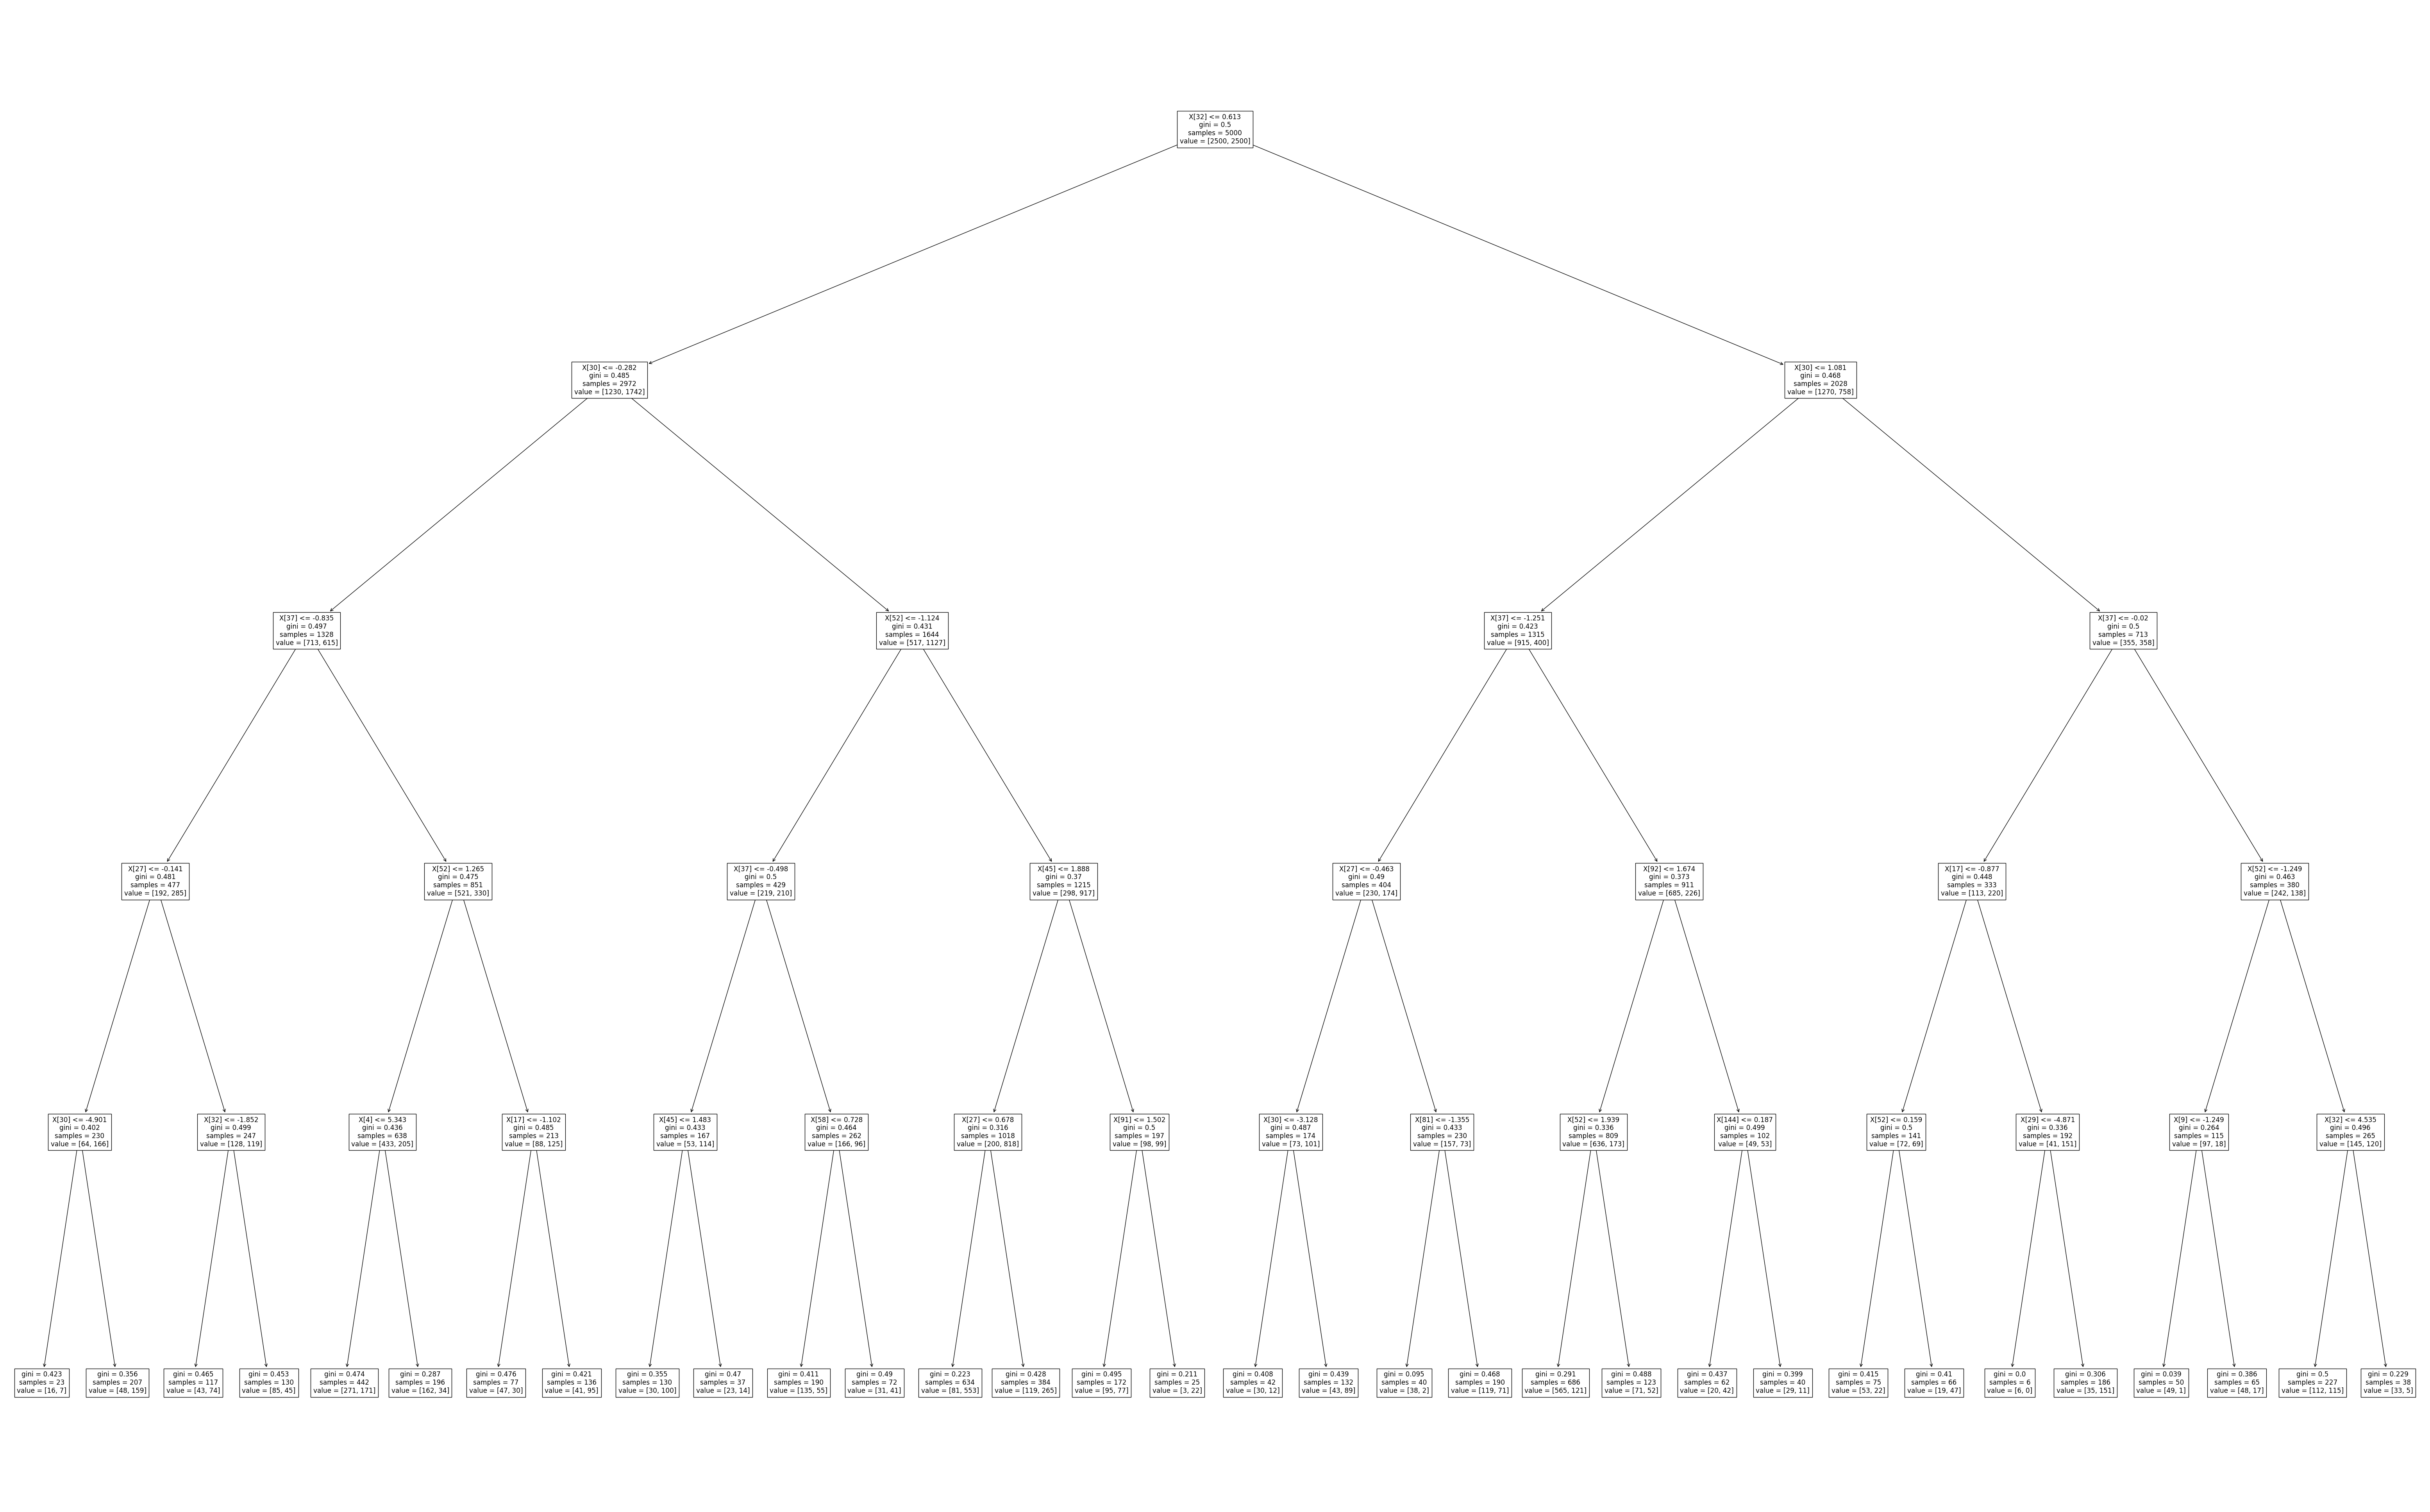

In [94]:
plot_tree(model)